MultiRAT dataset description code
================
Joanes Grandjean

![rat art](../assets/img/rat_art.png)

In this section, I provide a brief summary of the datasets that were
supplied for this study.

Normalization steps: - Columns with .orig have been left unaltered from
how it was provided by the dataset owner. - Strain was simplified. - Age
normalized to months, in 2 month bins. When long range are provided, the
middle bin is selected. - Weight normalized to in 50 g bins. When long
range are provided, the middle bin is selected. - Dexmedetomidine dose
converted to medetomidine (\*0.5) for simplicity. - Injectable
anesthesia dose converted to mg/kg - Bolus injectable added to induction
column, infusions kept in maintenance column. - Multiple anesthesia
agents for either induction or maintenance indicated with ‘/’.
Corresponding doses follow same order. - Measurement post induction,
breathing rate, heart rate rounded to the nearest tenth - TR and TE
converted to s - Bandwidth converted to Hz

First, I examine subject distribution

In [32]:
# init variables
init_folder='/home/traaffneu/joagra/code/MultiRat'
analysis_folder='/project/4180000.19/multiRat'
df_path='../assets/table/meta_data_20211208.tsv'

In [33]:
import pandas as pd
df = pd.read_csv(df_path, sep='\t')

In [3]:
# age 2-4 months is the most common in this dataset
df['rat.age'].value_counts()

2-4      328
0-2       65
4-6       36
1-2       36
16-18     32
6-8       18
8-10      14
12-14      8
18-20      6
14-16      2
Name: rat.age, dtype: int64

In [18]:
# as expected there is a strong male to female bias
df['rat.sex'].value_counts()

Male      477
Female    154
Name: rat.sex, dtype: int64

In [5]:
# isoflurane remains the most common anesthesia for maintenance.
df['anesthesia.maintenance'].value_counts()

isoflurane                   245
isoflurane / medetomidine    173
medetomidine                 126
urethane                      50
awake                         28
alpha-chloralose               9
Name: anesthesia.maintenance, dtype: int64

In [6]:
# Sprage Dawley and Wistar are the two most common strains in this dataset
df['rat.strain'].value_counts()

Wistar            263
Sprague Dawley    168
Long Evans         90
Fischer 344        80
Lister Hooded      30
Name: rat.strain, dtype: int64

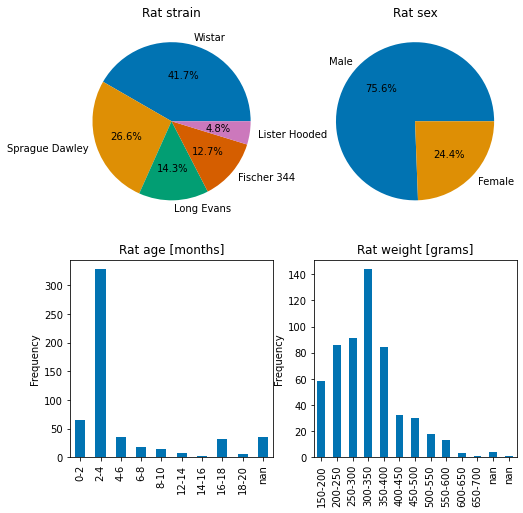

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("colorblind")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

df_age= df['rat.age'].value_counts().rename_axis('age').reset_index(name='counts')
df_age['age'] = pd.Categorical(df_age['age'], ["0-2", "2-4", "4-6","6-8","8-10","10-12","12-14","14-16","16-18","18-20"])

df_weight= df['rat.weight'].value_counts().rename_axis('weight').reset_index(name='counts')
df_weight['weight'] = pd.Categorical(df_weight['weight'] , ["150-200", 
                                                            "200-250", 
                                                            "250-300",
                                                            "300-350",
                                                            "350-400",
                                                            "400-450",
                                                            "450-500",
                                                            "500-550",
                                                            "550-600",
                                                            "600-650",
                                                            "650-700"])



ax1 = df['rat.sex'].value_counts().plot.pie(title='Rat sex',ax=axes[0,1],autopct="%.1f%%")
ax2 = df['rat.strain'].value_counts().plot.pie(title='Rat strain',ax=axes[0,0],autopct="%.1f%%")
ax3 = df_age.sort_values(by=['age']).plot.bar(x='age',y='counts', title='Rat age [months]',ax=axes[1,0])
ax4 = df_weight.sort_values(by=['weight']).plot.bar(x='weight',y='counts', title='Rat weight [grams]',ax=axes[1,1])

ax1.set(xlabel="", ylabel="")
ax2.set(xlabel="", ylabel="")
ax3.set(xlabel="", ylabel="Frequency")
ax4.set(xlabel="", ylabel="Frequency")
ax3.get_legend().remove()
ax4.get_legend().remove()

[Text(0.5, 0, 'Heart rate [bpm]')]

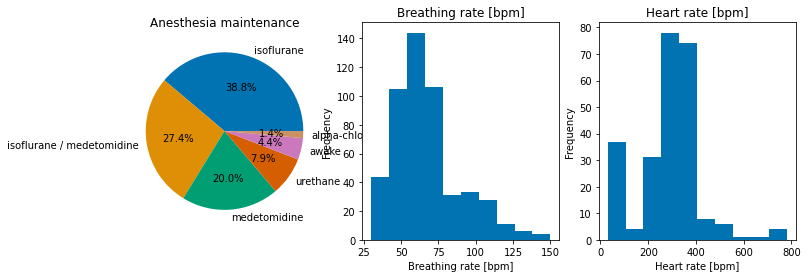

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

sns.set_palette("colorblind")

#ax1 = df['exp.type'].value_counts().plot.pie(title='Experiment type',ax=axes[0,1], autopct="%.1f%%")
ax2 = df['anesthesia.maintenance'].value_counts().plot.pie(title='Anesthesia maintenance',ax=axes[0],autopct="%.1f%%")    
ax3 = df['anesthesia.breathing.rate'].plot.hist(title='Breathing rate [bpm]',ax=axes[1])
ax4 = df['anesthesia.heart.rate'].plot.hist(title='Heart rate [bpm]',ax=axes[2])

#ax1.set(xlabel="", ylabel="")
ax2.set(xlabel="", ylabel="")
ax3.set(xlabel="Breathing rate [bpm]")
ax4.set(xlabel="Heart rate [bpm]")

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Heart rate [bpm]'),
 Text(0.5, 1.0, 'Anesthesia maintenance')]

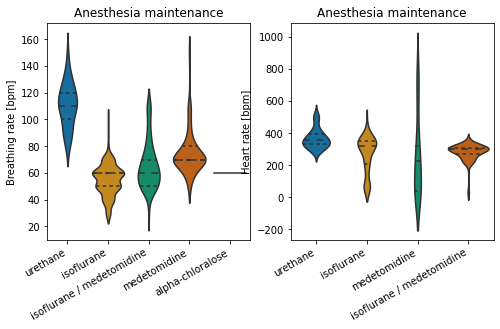

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.set_palette("colorblind")

df_tmp = df.dropna(subset=['anesthesia.breathing.rate'])
ax1 = sns.violinplot(x="anesthesia.maintenance", y="anesthesia.breathing.rate", data=df_tmp, inner="quartile",ax=axes[0])

df_tmp2 = df.dropna(subset=['anesthesia.heart.rate'])
ax2 = sns.violinplot(x="anesthesia.maintenance", y="anesthesia.heart.rate",  data=df_tmp2, inner="quartile", ax=axes[1])

                         
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
ax1.set(xlabel='', ylabel='Breathing rate [bpm]', title='Anesthesia maintenance')

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
ax2.set(xlabel='', ylabel='Heart rate [bpm]', title='Anesthesia maintenance')

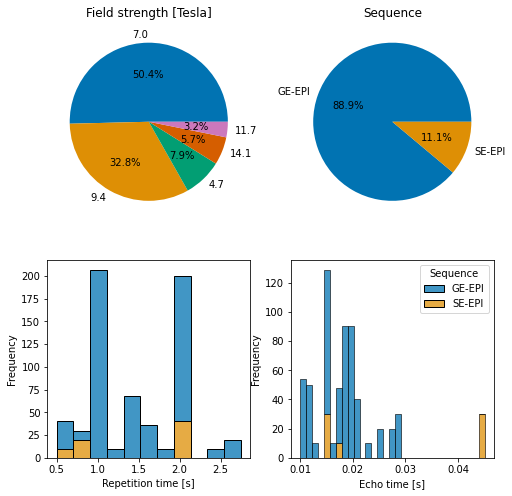

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

sns.set_palette("colorblind")

ax1 = df['MRI.field.strength'].value_counts().plot.pie(title='Field strength [Tesla]',ax=axes[0,0], autopct="%.1f%%")
ax2 = df['func.sequence'].value_counts().plot.pie(title='Sequence',ax=axes[0,1], autopct="%.1f%%")
ax3 = sns.histplot(data=df, x="func.TR", hue="func.sequence", multiple="stack",ax=axes[1,0])
ax4 = sns.histplot(data=df, x="func.TE", hue="func.sequence", multiple="stack",ax=axes[1,1])

ax1.set(xlabel="", ylabel="")
ax2.set(xlabel="", ylabel="")
ax3.set(xlabel="Repetition time [s]", ylabel="Frequency")
ax4.set(xlabel="Echo time [s]", ylabel="Frequency")
ax4.get_legend().set_title('Sequence')
ax3.get_legend().remove()


Overall, the dataset parameter distribution is aligned with our previous
observations about [fMRI in rodents](https://www.frontiersin.org/articles/10.3389/fninf.2019.00078/full)

We observe the classic 'male bias' found in neuroscience. Isoflurane remains the main anesthesia. Heart rate is lowest with medetomidine.  

Most common field strength are 7 and 9.4T. Gradient echo EPI is the most common acquisition, with TR between 1 and 2 s. 


In [37]:
df_sub = df[['rat.sex',
             'rat.strain',
             'rat.age',
             'rat.weight',
             'exp.type',
             'anesthesia.maintenance',
            'anesthesia.breathing.rate',
            'anesthesia.heart.rate',
            'MRI.vendor',
            'MRI.field.strength',
            'func.sequence',
            'func.TR',
            'func.TE']]

df_sub['MRI.field.strength']=df_sub['MRI.field.strength'].astype('str')

df_sub.describe()

,anesthesia.breathing.rate,anesthesia.heart.rate,func.TR,func.TE
count,512.000000,244.000000,631.000000,631.000000
mean,67.011719,288.155738,1.473800,0.019060
std,21.677585,132.386609,0.545743,0.007483
min,30.000000,30.000000,0.500000,0.010000
25%,50.000000,230.000000,1.000000,0.015000
50%,60.000000,310.000000,1.500000,0.018000
75%,70.000000,350.000000,2.000000,0.020000
max,150.000000,780.000000,2.750000,0.045000


In [38]:
df_sub.describe(include=[object])

,rat.sex,rat.strain,rat.age,rat.weight,exp.type,anesthesia.maintenance,MRI.vendor,MRI.field.strength,func.sequence
count,631,631,545,565,631,631,631,631,631
unique,2,5,10,13,1,6,3,5,2
top,Male,Wistar,2-4,300-350,resting-state,isoflurane,Bruker,7.0,GE-EPI
freq,477,263,328,144,631,245,535,318,561


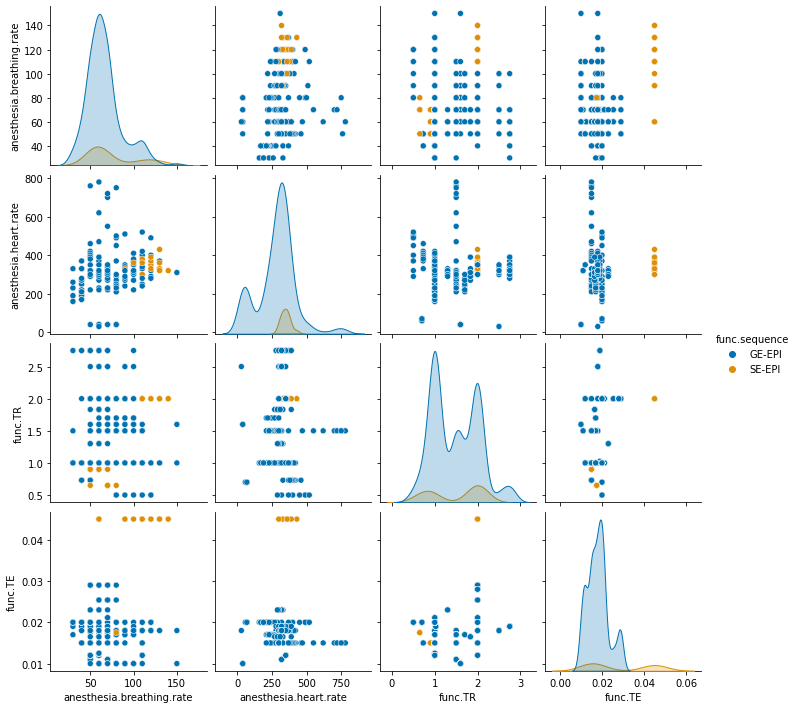

In [39]:
sns.pairplot(df_sub, hue="func.sequence")